NOTA : per fare questo grafico puoi usare direttamente il catalogo in questo pacchetto anzichè leggere il file txt e creare la tabella con Pandas. Link : https://psrqpy.readthedocs.io/en/latest/

In [29]:
#import Numpy
import os
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

#Now, import the FITS module inside Astropy
from astropy.io import fits

import math
import numpy.ma as ma

import pandas as pd

In [30]:
# Let's define te directory where you are with the "get current working directory" command...
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

#We can go up by using the path.dirname
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

#We can then define the data directory using the os.path.join command
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

#..and we can define some output directory with the results
results_dir = os.path.join(main_dir,"results")

#if the directory does not exist, you can create it...
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    print("Directory %s created !" % results_dir)

I am in dir /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r/code
Main directory is /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r
data dir is /home/sara/Scrivania/1magistrale/multimessenger/pulsar/experience-pulsars-Sara-a-r/data


In [31]:
#read data from a CSV file i.e. a Comma Separated Value text file 
data_filename = os.path.join(data_dir,"CATALOG.txt")

#read table giving name to columns
df = pd.read_csv(data_filename, sep = ';')
df

,#,NAME,Unnamed: 2,P0,Unnamed: 4,Unnamed: 5,P1,Unnamed: 7,Unnamed: 8,F0,Unnamed: 10,Unnamed: 11,F1,Unnamed: 13,Unnamed: 14,AGE,BSURF,EDOT,Unnamed: 18
0,NaN,NaN,NaN,(s),NaN,NaN,NaN,NaN,NaN,(Hz),NaN,NaN,(s^-2),NaN,NaN,(Yr),(G),(ergs/s),NaN
1,1.0,J0002+6216,cwp+17,0.1153635682680,1.400000e-12,cwp+17,5.96703E-15,7.000000e-20,cwp+17,8.6682478274,1.000000e-10,cwp+17,-0.448354E-12,5.000000e-18,cwp+17,3.06e+05,8.4e+11,1.5e+35,NaN
2,2.0,J0006+1834,cnt96,0.69374767047,1.400000e-10,cn95,2.097E-15,1.200000e-17,cn95,1.4414462816,3.000000e-10,cn95,-4.36E-15,3.000000e-17,cn95,5.24e+06,1.22e+12,2.5e+32,NaN
3,3.0,J0007+7303,aaa+09c,0.3158731909,3.000000e-10,awd+12,3.6039E-13,5.000000e-17,awd+12,3.165827392,3.000000e-09,awd+12,-3.6120E-12,5.000000e-16,awd+12,1.39e+04,1.08e+13,4.5e+35,NaN
4,4.0,J0011+08,dsm+16,2.55287,0.000000e+00,dsm+16,*,0.000000e+00,*,0.391716,0.000000e+00,dsm+16,*,0.000000e+00,*,*,*,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2868.0,J2351+8533,slr+14,1.01172719111,7.000000e-11,lsk+18,8.8E-16,4.000000e-17,lsk+18,0.98840874179,6.000000e-11,lsk+18,-8.6E-16,3.000000e-17,lsk+18,1.82e+07,9.55e+11,3.4e+31,NaN
2869,2869.0,J2352+65,hrk+08,1.164,0.000000e+00,hrk+08,*,0.000000e+00,*,0.859107,0.000000e+00,hrk+08,*,0.000000e+00,*,*,*,*,NaN
2870,2870.0,J2354-22,mbc+19,0.557996,0.000000e+00,mbc+19,*,0.000000e+00,*,1.792128,0.000000e+00,mbc+19,*,0.000000e+00,*,*,*,*,NaN
2871,2871.0,B2351+61,dbtb82,0.944783886655,1.100000e-11,hlk+04,1.626279E-14,9.000000e-20,hlk+04,1.058443115007,1.200000e-11,hlk+04,-1.821923E-14,9.000000e-20,hlk+04,9.2e+05,3.97e+12,7.6e+32,NaN


In [32]:
#show columns
df.columns

Index(['#', 'NAME', 'Unnamed: 2', 'P0', 'Unnamed: 4', 'Unnamed: 5', 'P1',
       'Unnamed: 7', 'Unnamed: 8', 'F0', 'Unnamed: 10', 'Unnamed: 11', 'F1',
       'Unnamed: 13', 'Unnamed: 14', 'AGE', 'BSURF', 'EDOT', 'Unnamed: 18'],
      dtype='object')

In [33]:
#remove some unuseful columns
df_new = df.drop(columns=['#','Unnamed: 2', 'Unnamed: 5', 'Unnamed: 8', 'Unnamed: 11', 'Unnamed: 14', 'Unnamed: 18'])

df_new.columns

Index(['NAME', 'P0', 'Unnamed: 4', 'P1', 'Unnamed: 7', 'F0', 'Unnamed: 10',
       'F1', 'Unnamed: 13', 'AGE', 'BSURF', 'EDOT'],
      dtype='object')

In [34]:
df_new

,NAME,P0,Unnamed: 4,P1,Unnamed: 7,F0,Unnamed: 10,F1,Unnamed: 13,AGE,BSURF,EDOT
0,NaN,(s),NaN,NaN,NaN,(Hz),NaN,(s^-2),NaN,(Yr),(G),(ergs/s)
1,J0002+6216,0.1153635682680,1.400000e-12,5.96703E-15,7.000000e-20,8.6682478274,1.000000e-10,-0.448354E-12,5.000000e-18,3.06e+05,8.4e+11,1.5e+35
2,J0006+1834,0.69374767047,1.400000e-10,2.097E-15,1.200000e-17,1.4414462816,3.000000e-10,-4.36E-15,3.000000e-17,5.24e+06,1.22e+12,2.5e+32
3,J0007+7303,0.3158731909,3.000000e-10,3.6039E-13,5.000000e-17,3.165827392,3.000000e-09,-3.6120E-12,5.000000e-16,1.39e+04,1.08e+13,4.5e+35
4,J0011+08,2.55287,0.000000e+00,*,0.000000e+00,0.391716,0.000000e+00,*,0.000000e+00,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,J2351+8533,1.01172719111,7.000000e-11,8.8E-16,4.000000e-17,0.98840874179,6.000000e-11,-8.6E-16,3.000000e-17,1.82e+07,9.55e+11,3.4e+31
2869,J2352+65,1.164,0.000000e+00,*,0.000000e+00,0.859107,0.000000e+00,*,0.000000e+00,*,*,*
2870,J2354-22,0.557996,0.000000e+00,*,0.000000e+00,1.792128,0.000000e+00,*,0.000000e+00,*,*,*
2871,B2351+61,0.944783886655,1.100000e-11,1.626279E-14,9.000000e-20,1.058443115007,1.200000e-11,-1.821923E-14,9.000000e-20,9.2e+05,3.97e+12,7.6e+32


In [35]:
#rename columns
table = df_new.rename(columns = {'Unnamed: 4': 'ERR_P0', 'Unnamed: 7': 'ERR_P1','Unnamed: 10': 'ERR_F0','Unnamed: 13': 'ERR_F1',
                                'P0': 'P0 (s)', 'F0': 'F0 (Hz)','F1': 'F1 (s^-2)','AGE': 'AGE (Yr)','BSURF': 'BSURF (G)','EDOT': 'EDOT (ergs/s)'
                                }, inplace = False)
#remove row 0
table = table.drop(index=0)

table

,NAME,P0 (s),ERR_P0,P1,ERR_P1,F0 (Hz),ERR_F0,F1 (s^-2),ERR_F1,AGE (Yr),BSURF (G),EDOT (ergs/s)
1,J0002+6216,0.1153635682680,1.400000e-12,5.96703E-15,7.000000e-20,8.6682478274,1.000000e-10,-0.448354E-12,5.000000e-18,3.06e+05,8.4e+11,1.5e+35
2,J0006+1834,0.69374767047,1.400000e-10,2.097E-15,1.200000e-17,1.4414462816,3.000000e-10,-4.36E-15,3.000000e-17,5.24e+06,1.22e+12,2.5e+32
3,J0007+7303,0.3158731909,3.000000e-10,3.6039E-13,5.000000e-17,3.165827392,3.000000e-09,-3.6120E-12,5.000000e-16,1.39e+04,1.08e+13,4.5e+35
4,J0011+08,2.55287,0.000000e+00,*,0.000000e+00,0.391716,0.000000e+00,*,0.000000e+00,*,*,*
5,B0011+47,1.240699038946,1.100000e-11,5.6446E-16,1.400000e-19,0.805997239145,7.000000e-12,-3.6669E-16,9.000000e-20,3.48e+07,8.47e+11,1.2e+31
...,...,...,...,...,...,...,...,...,...,...,...,...
2868,J2351+8533,1.01172719111,7.000000e-11,8.8E-16,4.000000e-17,0.98840874179,6.000000e-11,-8.6E-16,3.000000e-17,1.82e+07,9.55e+11,3.4e+31
2869,J2352+65,1.164,0.000000e+00,*,0.000000e+00,0.859107,0.000000e+00,*,0.000000e+00,*,*,*
2870,J2354-22,0.557996,0.000000e+00,*,0.000000e+00,1.792128,0.000000e+00,*,0.000000e+00,*,*,*
2871,B2351+61,0.944783886655,1.100000e-11,1.626279E-14,9.000000e-20,1.058443115007,1.200000e-11,-1.821923E-14,9.000000e-20,9.2e+05,3.97e+12,7.6e+32


In [36]:
#------------------------------PROPERTY OF PSR J2021+3651--------------------------------- 
#define f0 and f1 founded in Z test
f0 = 9.639344926697488
f1 = -8.889199999999993e-12

#-----------------------------------CHARACTERISTIC AGE---------------------------
P = 1/f0 #seconds
Pdot = -f1/(f0)**2
tau_c = ( P/(2*Pdot) ) / (60*60*24*365) #years

print('P = %f s \nPdot = %e s \ntau_c = %f yr' % (P, Pdot, tau_c))

#--------------------------------MAGNETIC FIELD---------------------------------
B = 3.2e19 * np.sqrt(P * Pdot)

print('B = %e Gauss' % B)

#-------------------------------ROTATION LUMINOSITY---------------------------------
I = 1e45 #g/cm^2
Edot = 4*np.pi**2*I*Pdot/P**3

print('Edot = %e erg/s' % Edot)


#----------------------------CATALOGUE-------------------------------------------------
print('---------------------------------------------------------')
table[2676:2677]

P = 0.103741 s 
Pdot = 9.566821e-14 s 
tau_c = 17192.864515 yr
B = 3.187939e+12 Gauss
Edot = 3.382750e+36 erg/s
---------------------------------------------------------


,NAME,P0 (s),ERR_P0,P1,ERR_P1,F0 (Hz),ERR_F0,F1 (s^-2),ERR_F1,AGE (Yr),BSURF (G),EDOT (ergs/s)
2677,J2021+3651,0.103740952074,4.000000e-12,9.57209E-14,7.000000e-19,9.6393948581,3.000000e-10,-8.89419E-12,6.000000e-17,1.72e+04,3.19e+12,3.4e+36


In [41]:
#delete psr (in catalog) whose period is undefined
catalog = table[(table['P0 (s)'] != '*') & (table['P1'] != '*') ]

#convert in array P and Pdot of psr
P_psr = np.asarray(catalog['P0 (s)'])
Pdot_psr = np.asarray(catalog['P1'])

#remove '' in each valeu of the array
Period = np.array(P_psr).astype(float)
Period_dot = np.array(Pdot_psr).astype(float)

#take the log10 of P and Pdot
#ln_P = np.log10(Period)
#ln_Pdot = np.log10(Period_dot)

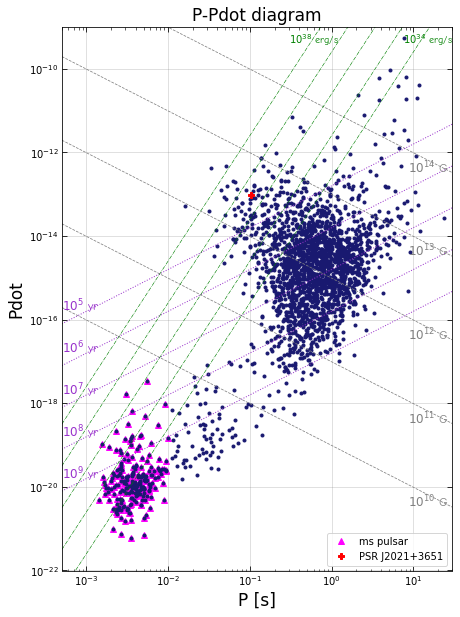

In [45]:
#let's do the plot
fig, ax = plt.subplots(1, figsize=(7,10))
plt.rc('font',size=10)
plt.title('P-Pdot diagram', fontsize = 17)
ax.minorticks_on()
ax.tick_params('x', which='major', direction='in', length=5., top = True)
ax.tick_params('y', which='major', direction='in', length=5., right = True)
ax.tick_params('x', which='minor', direction='in', length=2.5,bottom=True, top = True)
ax.grid(b=True, color='grey', linestyle='-', alpha=0.3)
ax.set_ylabel('Pdot', fontsize = 17)
ax.set_xlabel('P [s]', fontsize = 17)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.5e-3,30)
ax.set_ylim(1e-22,1e-9)


#millisecond pulsar
mpsr = Period[Period < 10e-3]
mpsr_dot = Period_dot[Period < 10e-3]
ax.plot(mpsr, mpsr_dot, marker='^', linestyle='', color = 'Magenta', label = 'ms pulsar')

#plot a point for each psr
ax.plot(Period, Period_dot, marker='.', linestyle='', color = 'MidnightBlue')

#MY PULSAR <3
ax.plot(Period[catalog['NAME'] == 'J2021+3651'], Period_dot[catalog['NAME'] == 'J2021+3651'],
        marker='P',color = 'red', label = 'PSR J2021+3651',linestyle='')

ax.legend()
#----------------------------------------MAGNETIC FIELD------------------------------------
#funcion that return Pdot for different value of B
def field(p, B):
    return B**2/((3.2e19)**2 * p)  #return Pdot

#array of periods
pp = np.linspace(0.5e-3,30,len(Period))

#plot lines
B = 10**10
i=10
while B<1e15:
    ax.plot(pp,field(pp,B), color = 'gray', ls = '--', lw = '0.75')
    ax.text(8.5, field(30,B), '$10^{%i}$ G' %i, color = 'gray', size = 'large', family = 'cursive')
    B *= 10
    i +=1
    
#-------------------------------------CHARACTERISTIC AGE-------------------------------------
#function that return Pdot for different Tau
def tau(p, Tau):
    return p / (2 * Tau)


#plot lines
T0 = (60 * 60 * 24 * 365.25) * 1000 * 100 #start from 10^5 yr
Tau = T0
j = 5
while Tau < T0 * 1e5:
    ax.plot(pp,tau(pp,Tau), color = 'DarkOrchid', ls = ':', lw = '1')
    ax.text(0.5e-3, tau(1e-3,Tau), '$10^{%i}$ yr' %j, color = 'DarkOrchid', size = 'large', family = 'cursive')
    Tau *= 10
    j += 1
    

#-------------------------------PULSAR DEATH LINE [eq .(9) from Chen & Ruderman 1993]--------------------
#the equation depend on the EOS
#C = 3.2e19
#ax.plot(pp, 10**((78 - 7 * np.log10(C) + 9.5 * np.log10(pp)) / 3.5), 'k-')
#ax.plot(pp, 10**((9/4)*np.log10(pp)-10.58), 'k-')


#---------------------------------------------LUMINOSITY-------------------------------------------
#function that return Pdot for different Tau
def lum(p, L):
    return p**3 * L / (4*np.pi**2 *1e45)


#plot lines
L = 1e34
while L < 1e38:
    ax.plot(pp,lum(pp,L), color = 'green', ls = '-.', lw = '0.6')
    L *= 10

ax.text(7.5,0.4e-9, '$10^{34}$ erg/s', color = 'green', size = 'medium', family = 'cursive')
ax.text(0.3,0.4e-9, '$10^{38}$ erg/s', color = 'green', size = 'medium', family = 'cursive')


#save figure in results directory
out_name = os.path.join(results_dir,"PPdot.png")
plt.savefig(out_name, dpi = 300)
plt.show()